In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("datos_nuevas_variables.csv")

In [10]:
df = df.rename(columns={'Partículas<2.5': 'Particulas_2_5',
                       'Partículas<10': 'Particulas_10'})

In [12]:
target = "Particulas_2_5"

In [13]:
X = df.drop(columns=target)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [14]:
param_grid_xgb = {
    'n_estimators': [35, 50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
}

In [15]:
grid_search_xgb = GridSearchCV(estimator=XGBRegressor(random_state=42),
                               param_grid=param_grid_xgb,
                               cv=3,
                               scoring='neg_mean_squared_error',
                               verbose=3)

In [16]:
grid_search_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=35, subsample=0.8;, score=-19.527 total time=   5.3s
[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=35, subsample=0.8;, score=-21.590 total time=   4.9s
[CV 3/3] END learning_rate=0.01, max_depth=3, n_estimators=35, subsample=0.8;, score=-37.548 total time=   5.0s
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=35, subsample=1.0;, score=-19.525 total time=   4.6s
[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=35, subsample=1.0;, score=-21.592 total time=   4.3s
[CV 3/3] END learning_rate=0.01, max_depth=3, n_estimators=35, subsample=1.0;, score=-37.544 total time=   4.5s
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=-15.632 total time=   6.1s
[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=-17.482 total time=   6.3s
[CV 3/3] END learning_rate=0.01, max_depth=

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [35, 50, 100],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=3)

In [17]:
modelo_xgb = grid_search_xgb.best_estimator_

y_pred_xgb = modelo_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXgboost PM<2.5:")
print(f"mse: {mse_xgb:.2f}")
print(f"r2 score: {r2_xgb:.2f}")


Xgboost PM<2.5:
mse: 3.48
r2 score: 0.85


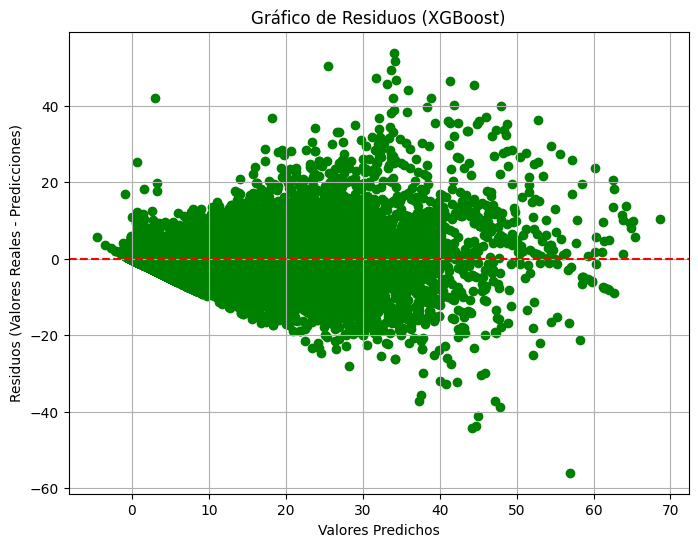

In [18]:
plt.figure(figsize=(8, 6))
residuals_xgb = y_test - y_pred_xgb
plt.scatter(y_pred_xgb, residuals_xgb, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos (Valores Reales - Predicciones)')
plt.title('Gráfico de Residuos (XGBoost)')
plt.grid(True)
plt.show()

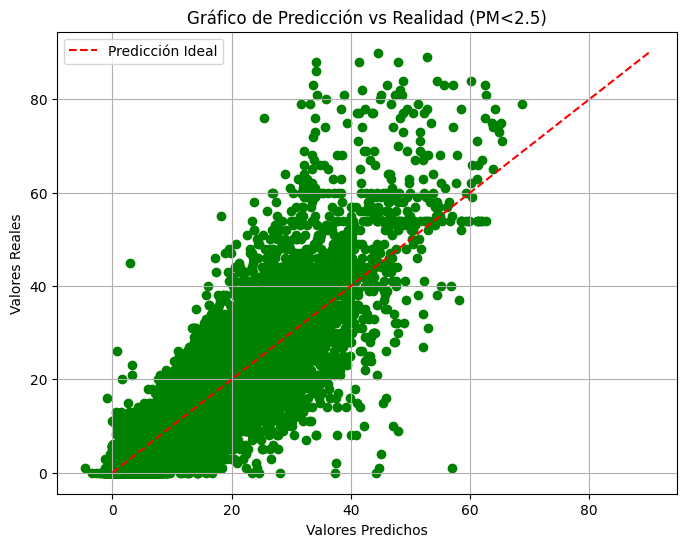

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_xgb, y_test, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Predicción Ideal')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Reales')
plt.title('Gráfico de Predicción vs Realidad (PM<2.5)')
plt.grid(True)
plt.legend()
plt.show()

In [85]:
param_grid_rf = {
    'n_estimators': [35, 50],
    'max_depth': [3, 5],
    'min_samples_split': [2],
    'max_features': [35, 60]
}

In [86]:
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=param_grid_rf,
                              cv=3,
                              scoring='neg_mean_squared_error',
                              verbose=3)

In [87]:
grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END max_depth=3, max_features=35, min_samples_split=2, n_estimators=35;, score=-5.740 total time= 2.3min
[CV 2/3] END max_depth=3, max_features=35, min_samples_split=2, n_estimators=35;, score=-7.112 total time= 2.2min
[CV 3/3] END max_depth=3, max_features=35, min_samples_split=2, n_estimators=35;, score=-14.385 total time= 2.5min
[CV 1/3] END max_depth=3, max_features=35, min_samples_split=2, n_estimators=50;, score=-5.839 total time= 3.4min
[CV 2/3] END max_depth=3, max_features=35, min_samples_split=2, n_estimators=50;, score=-7.041 total time= 3.3min
[CV 3/3] END max_depth=3, max_features=35, min_samples_split=2, n_estimators=50;, score=-14.512 total time= 3.6min
[CV 1/3] END max_depth=3, max_features=60, min_samples_split=2, n_estimators=35;, score=-5.053 total time= 4.2min
[CV 2/3] END max_depth=3, max_features=60, min_samples_split=2, n_estimators=35;, score=-6.742 total time= 4.3min
[CV 3/3] END max_depth=3, 

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 5], 'max_features': [35, 60],
                         'min_samples_split': [2], 'n_estimators': [35, 50]},
             scoring='neg_mean_squared_error', verbose=3)

In [91]:
modelo_rf = grid_search_rf.best_estimator_

y_pred_rf = modelo_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor:")
print(f"mse: {mse_rf:.2f}")
print(f"r2 score: {r2_rf:.2f}")


Random Forest Regressor:
mse: 3.67
r2 score: 0.85


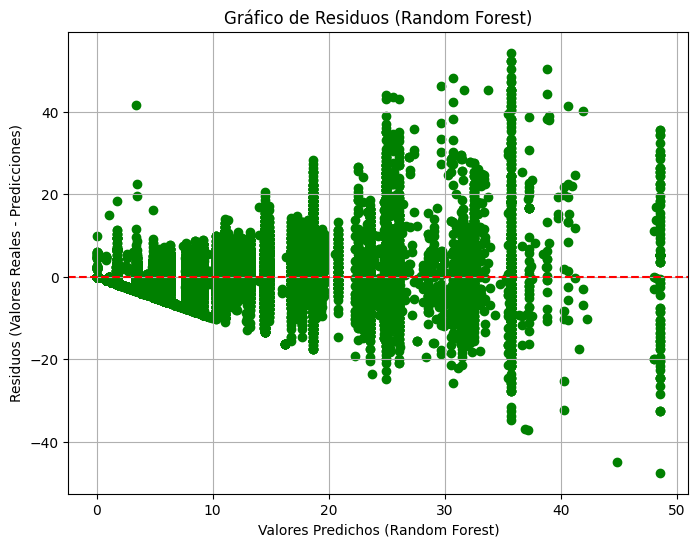

In [92]:
plt.figure(figsize=(8, 6))
residuals_rf = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals_rf, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos (Random Forest)')
plt.ylabel('Residuos (Valores Reales - Predicciones)')
plt.title('Gráfico de Residuos (Random Forest)')
plt.grid(True)
plt.show()

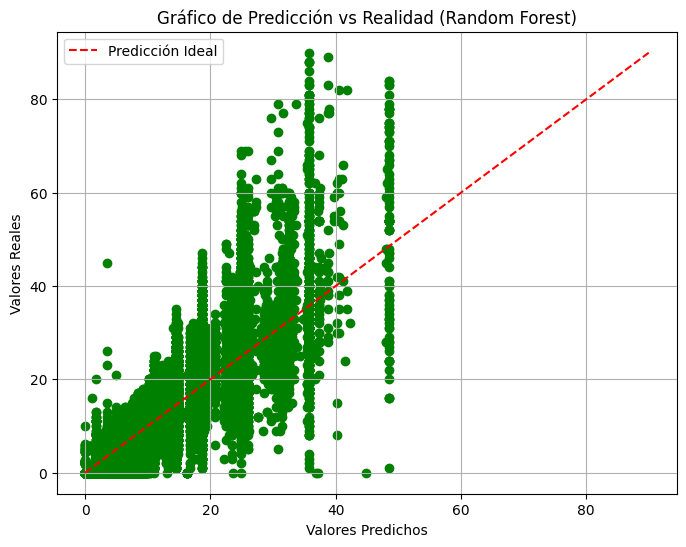

In [93]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, y_test, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Predicción Ideal')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Reales')
plt.title('Gráfico de Predicción vs Realidad (Random Forest)')
plt.grid(True)
plt.legend()
plt.show()

In [116]:
import joblib

In [118]:
joblib.dump(modelo_xgb, "modelo_xgb_pm25.pkl")

['modelo_xgb_pm25.pkl']

In [47]:
params = grid_search_xgb.best_params_
params

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}